In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression



Keywords: linear regression, nonparametric regression

## Description


## Source


## Hypothesis

The number of bedrooms is a predictor for the list price of the house


In [10]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('../data/zillow_realtor_homes_201804.csv')
data.head()

,zip code,size rank,price,bedroom,Nielson household rank,hotness rank,supply score,demand score,median days on market
0,66062,57,243300,2,74,574,90.94160,95.15714,29
1,66062,59,347300,5,74,574,90.94160,95.15714,29
2,66062,68,277600,4,74,574,90.94160,95.15714,29
3,66062,69,215500,3,74,574,90.94160,95.15714,29
4,66061,256,125200,2,398,5683,50.86883,73.84731,58


In [21]:
# Assign the data to X and y

X = data['hotness rank'].values.reshape(-1, 1)
y = data.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (354, 1) (354, 1)


array([[  574],
       [  574],
       [  574],
       [  574],
       [ 5683],
       [ 5683],
       [ 5683],
       [ 5683],
       [  613],
       [  613],
       [  613],
       [ 2116],
       [  523],
       [ 1023],
       [ 1023],
       [ 1299],
       [ 1023],
       [ 1299],
       [ 1023],
       [ 5836],
       [ 2925],
       [ 6735],
       [  208],
       [ 1299],
       [ 1299],
       [  208],
       [ 5604],
       [ 5604],
       [  208],
       [ 8089],
       [  208],
       [ 1062],
       [ 2664],
       [ 5604],
       [ 5604],
       [ 1062],
       [ 2116],
       [  523],
       [ 1062],
       [ 1312],
       [ 1062],
       [ 1182],
       [ 2116],
       [  523],
       [ 1312],
       [ 1984],
       [ 2929],
       [ 2116],
       [  523],
       [ 2116],
       [ 1984],
       [  523],
       [ 2088],
       [ 1312],
       [ 1182],
       [ 1312],
       [ 1399],
       [  134],
       [ 1182],
       [ 2341],
       [ 2929],
       [ 4850],
       [

In [22]:
# build the model
model = LinearRegression()
model.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-0.33460988]]
y-axis intercept:  [ 235979.07617085]


In [24]:
# calculate min, max
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"x_min {x_min}")
print(f"x_max {x_max}")

x_min [[23]]
x_max [[11929]]


In [25]:
y_min = model.predict(x_min)
print(f"True output: {y[0]}")


True output: [243300]


In [26]:
y_max = model.predict(x_max)
print(f"True output: {y[0]}")

True output: [243300]


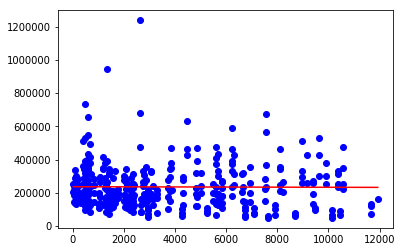

In [27]:
# Plot the data
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [28]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 0.04]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[23]]
Max X Value: [[11929]]


In [29]:
# Calculate the mean_squared_error and the r-squared score
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print(f'mse {mse}')
print(f'r2 {r2}')


mse 18878444142.39661
r2 5.696873322980078e-05
